# 1. Regressão Linear
* Uma função capaz de explicar o valor de uma variável $y$ através de variáveis de entrada $x$.
* Exemplo de concessão de crédito (o objetivo é encontrar uma relação linear entre Salário e Crédito):

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

salario = np.array([1500, 2000, 3000, 3500, 4200, 6800, 9900]).astype(np.float64)
credito = np.array([10000, 15000, 18000, 18500, 25000, 55000, 80000]).astype(np.float64)
data = pd.DataFrame({
    "salario": salario,
    "credito": credito
})
data

,salario,credito
0,1500.0,10000.0
1,2000.0,15000.0
2,3000.0,18000.0
3,3500.0,18500.0
4,4200.0,25000.0
5,6800.0,55000.0
6,9900.0,80000.0


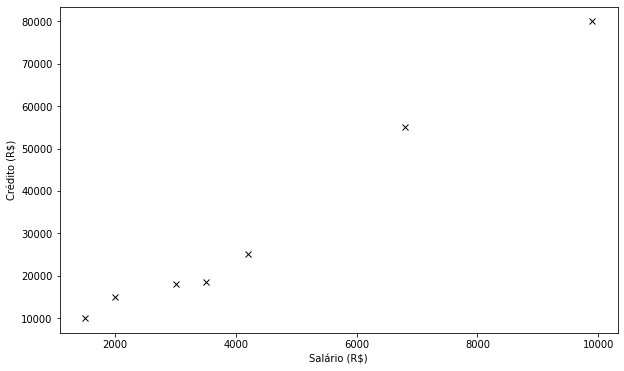

In [2]:
plt.figure(figsize=(10, 6))
plt.plot(data["salario"], data["credito"], "kx")
plt.xlabel("Salário (R$)")
plt.ylabel("Crédito (R$)")
plt.show()

* A relação linear é descrita como
$$\hat{y}_i = w_1x_i + w_0,$$
e o objetivo é aprender os valores dos parâmetros $w_1$ e $w_0$ que melhor generalizem os dados.

* Para aprender os valores do parâmetros da equação linear acima é utilizada a seguinte função de perda:
$$\mathcal{J}(w_0, w_1) = \frac{1}{2n}\sum_{i = 1}^n e_i^2,$$
em que $e_i^2 = (y_i - \hat{y}_i)^2$ (erro quadrático).
* A função de perda acima deve ser otimizada em relação aos parâmetros de modo que o erro quadrático seja minimizado:
$$\underset{w_0w_1}{\arg\min}\:\:\mathcal{J}(w_0, w_1).$$

* Abaixo é mostrada a superfície da funçao de perda. Note que a função é convexa, possuindo apenas um mínimo global. O valor ótimo para os parâmetros $w_0$ e $w_1$ são aqueles em que o valor da função de perda é o mínimo.

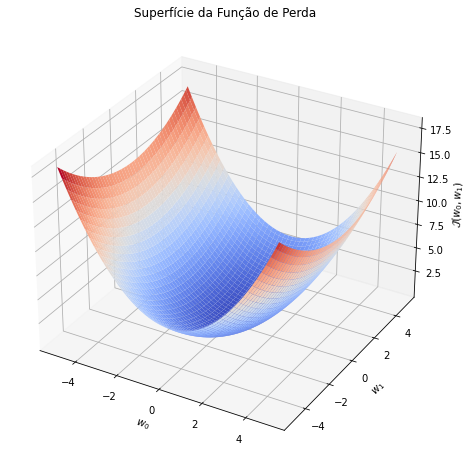

In [3]:
def loss_fn(w0, w1, x, y):
    losses = list()
    for w0_, w1_ in zip(w0.ravel(), w1.ravel()):
        y_hat = w0_ + w1_ * x
        loss = 0.5 * np.mean(np.square(y - y_hat))
        losses.append(loss)
        
    return np.array(losses).reshape(w0.shape)

x = np.linspace(-1, 1, 100)
y = (x * 0.5 + 0.1) + np.random.normal(scale=0.1, size=100)

w0 =  w1 = np.linspace(-5, 5, 200)
w0, w1 = np.meshgrid(w0, w1)

J = loss_fn(w0, w1, x, y)

fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(1, 1, 1, projection="3d")
surface = ax.plot_surface(w0, w1, J, cmap="coolwarm")
ax.set_title("Superfície da Função de Perda")
ax.set_xlabel("$w_0$")
ax.set_ylabel("$w_1$")
ax.set_zlabel("$\mathcal{J}(w_0, w_1)$")
plt.show()

## 1.1 Aplicando a Regressão Linear

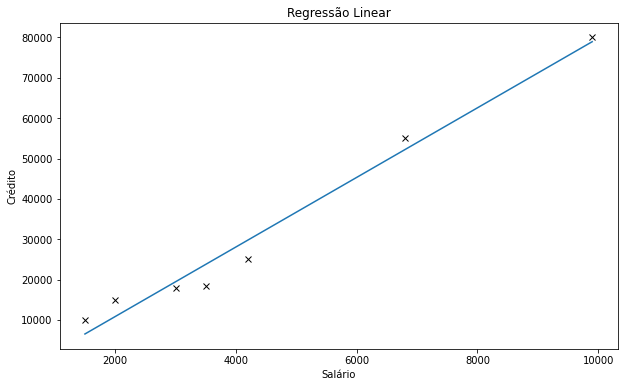

In [4]:
# scikit-learn: https://scikit-learn.org/stable/
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler

# configurando e normalizando o conjunto de dados
# a normalização dos dados é importante pois previne que variáveis com valores de alta magnitude dominem as estatísticas
# os métodos mais comuns de normalização são o StandardScaler e o MinMaxScaler
X, y = data["salario"].to_numpy().reshape(-1, 1), data["credito"].to_numpy()
scaler = StandardScaler().fit(X)
X = scaler.transform(X)

# inicializando o modelo
model = LinearRegression()

# treinando o modelo
model.fit(X, y)

# realizando previsões com o modelo (prevendo a saída para a sequência de valores X_test)
y_hat = model.predict(X)

##########################################################
# regressão linear
plt.figure(figsize=(10, 6))
plt.plot(scaler.inverse_transform(X).ravel(), y, "kx") # plot dos dados
plt.plot(scaler.inverse_transform(X).ravel(), y_hat) # plot da reta que o modela gerou
plt.title("Regressão Linear")
plt.xlabel("Salário")
plt.ylabel("Crédito")
plt.show()

# 2. Regressão Linear Multivariada
* Suponha que foi inserida a variável Dívida no exemplo de concessão de crédito. O objetivo agora é usar a informação contida em Salário e Dívida para explicar a variável de Crédito. Matematicamente:

$$y_i = w_0 + w_1x_{i1} + w_2x_{i2}.$$

* Uma forma mais simples de expressar a equação acima é considerar que $x_{i0} = 1$ (note que agora é possível resumir a equação linear para qualquer quantidade de atributos como um produto interno entre dois vetores):
$$y_i = \mathbf{w}^T\mathbf{x}_i.$$

In [5]:
divida = np.array([0, 2000, 1500, 5000, 8000, 2500, 20000]).astype(np.float64)
data["divida"] = divida
data

,salario,credito,divida
0,1500.0,10000.0,0.0
1,2000.0,15000.0,2000.0
2,3000.0,18000.0,1500.0
3,3500.0,18500.0,5000.0
4,4200.0,25000.0,8000.0
5,6800.0,55000.0,2500.0
6,9900.0,80000.0,20000.0


In [6]:
from sklearn.metrics import mean_squared_error

# configurando e normalizando o conjunto de dados
X, y = data[["salario", "divida"]].to_numpy(), data["credito"].to_numpy()
scaler = StandardScaler().fit(X)
X = scaler.transform(X)

# inicializando o modelo
model = LinearRegression()
model.fit(X, y)

# calculando a saída do modelo
y_hat = model.predict(X)

# calculando a performance do modelo
print(f"Coefficient of determination R² (melhor valor possível é 1.0): {model.score(X, y):.2f}")
print(f"Mean Squared Error (MSR) - Quanto menor melhor: {mean_squared_error(y, y_hat):.2f}") # calcula o erro médio quadrático np.mean(np.square(y - y_hat))

Coefficient of determination R² (melhor valor possível é 1.0): 0.98
Mean Squared Error (MSR) - Quanto menor melhor: 11480813.78


# 3. Exercício: Testando um modelo de Regressão Linear
* Com o objetivo de simular um ambiente de produção é importante considerar um conjunto de dados de treinamento e um conjunto de dados de teste.
* Esses dois conjuntos de dados são criados usando partições dos dados já disponíveis.
* O método de normalização dos dados deve ser ajustado no conjunto de dados conhecido (ou seja, o conjunto de dados de treinamento).
* O conjunto de dados de teste serve para simular dados que o modelo não conhece (isto é, dados que não foram apresentados para o modelo durante o treinamento).
* Durante os testes, o conjunto de testes deve ser normalizado e usado para quantificar a performance do modelo.

## 3.1 Dados Sintéticos
* Aplique a regressão linear nos dados sintéticos gerados abaixo;
1. Apresente uma figura mostrando os dados;
2. Separe o conjunto de dados em um conjunto de treinamento (80% dos dados) e um conjunto de testes (20% dos dados) (veja a função *train_test_split* do scikit-learn);
3. Normalize os dados (use StandardScaler ou MinMaxScaler). Note que a função *fit* da classe de normalização deve ser usada apenas no conjunto de treinamento;
4. Instance o modelo (LinearRegression) e use o conjunto de dados de treinamento para treinar o modelo;
5. Normalize os dados de teste.
6. Calcule a performance do modelo no conjunto de dados de teste (use as medidas R² e MSR).
7. Apresente uma figura mostrando a curva que o modelo aprendeu.

In [8]:
rng = np.random.RandomState(0) # instancia uma objeto para gerar números aleatórios com um *seed* específico
X = np.linspace(-3, 3, 100).reshape(-1, 1) # gerando uma sequência de valores para usar como atributo (x)
y = x * 0.3 + 0.2 # gerando o valor esperado (y) para cada valor de x
y += rng.normal(scale=0.1, size=100) # adicionando ruído na variável y

## 3.2 Dados Reais
* Aplique a Regressão Linear no conjunto de dados *Brazilian Houses Rent* (não é preciso fazer nenhum tipo de tratamento nos dados). Use as colunas *area, rooms, bathroom, parking spaces* e *hoa* para explicar a variável *rent amount*.
1. Separe o conjunto de dados em um conjunto de treinamento (80% dos dados) e um conjunto de testes (20% dos dados) (veja a função *train_test_split* do scikit-learn);
2. Normalize os dados (use StandardScaler ou MinMaxScaler). Note que a função *fit* da classe de normalização deve ser usada apenas no conjunto de treinamento;
3. Instance o modelo (LinearRegression) e use o conjunto de dados de treinamento para treinar o modelo;
4. Normalize os dados de teste.
5. Calcule a performance do modelo no conjunto de dados de teste (use as medidas R² e MSR).